In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sci

0.0


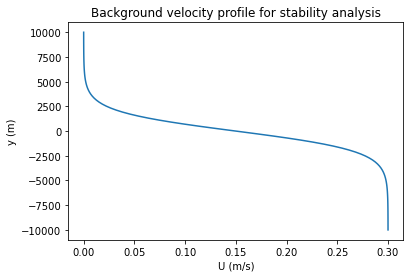

In [10]:
#Define variables 
N = 100
k = np.linspace(0,6,N)*1e-4


#Background velocity profile

y = np.linspace(-10,10,N)*1e3
U = 0.15*(1.+np.tanh(-y/2.e3))
plt.xlabel("U (m/s)")
plt.ylabel("y (m)")
plt.title("Background velocity profile for stability analysis")
plt.plot(U,y)

In [3]:
A = np.zeros([N,N])
B = np.zeros([N,N])

In [4]:
def initialize_wavenumber_matrix(k,U,A,B,y):
    '''
    Enter the wavenumber and fct will output corresponding matrices A and B
    '''
    
    A[0][0] = -1.*(U[1] - U[0])/(y[1]-y[0])**2 + U[0]*(-2./((y[1]-y[0])**2) - k**2)
    print(A[0][0])
    A[0][1] = U[0] / (y[1]-y[0])**2
    A[N-1][N-1] = -1.*(U[1] - U[0])/(y[1]-y[0])**2 + U[0]*(-2./((y[1]-y[0])**2) - k**2)
    A[N-1][N-2] = U[0] / (y[1]-y[0])**2 # U_1 and U_0 may need to be switched for vals at end of U instead (not sure if uniform)
    
    B[0][0] = -2./((y[1]-y[0])**2) - k**2
    B[0][1] = 1. / (y[1]-y[0])**2
    B[N-1][N-1] = -2./((y[1]-y[0])**2) - k**2
    B[N-1][N-2] = 1. / (y[1]-y[0])**2
    
    for i in range(1,99):
        A[i][i-1] = U[i] / (y[1]-y[0])**2
        A[i][i] = U[i]*((-2/(y[1]-y[0])**2) - k**2) - (U[i+1] + U[i-1] -2*U[i])/(y[1]-y[0])**2 #need to change k for all inputs of k probably add a function here
        A[i][i+1] = U[i] / (y[1]-y[0])**2
        B[i][i-1] = 1 / (y[1]-y[0])**2
        B[i][i] = (-2/(y[1]-y[0])**2) - k**2
        B[i][i+1] = 1 / (y[1]-y[0])**2
    return A,B

In [11]:
A,B = initialize_wavenumber_matrix(k[10],U,A,B,y)


-1.4701859757525727e-05


In [12]:
sci.eigh(A,B)

LinAlgError: The leading minor of order 1 of B is not positive definite. The factorization of B could not be completed and no eigenvalues or eigenvectors were computed.